In [37]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 1. Ï†ïÌôïÌïú Í≤ΩÎ°úÏóêÏÑú Ìè∞Ìä∏ Î∂àÎü¨Ïò§Í∏∞
font_path = "C:/Windows/Fonts/malgun.ttf"  # 'ÎßëÏùÄ Í≥†Îîï' Í≤ΩÎ°ú
font_prop = fm.FontProperties(fname=font_path)

# 2. Ï†ÑÏ≤¥ ÏÑ§Ï†ï Ï†ÅÏö© (Ìè∞Ìä∏ Ïù¥Î¶Ñ ÏßÅÏ†ë Î™ÖÏãú)
plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["axes.unicode_minus"] = False
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)



In [57]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 1. Ï†ïÌôïÌïú Ìè∞Ìä∏ Í≤ΩÎ°ú
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = font_prop.get_name()  # ‚úÖ ÌïµÏã¨
plt.rcParams["axes.unicode_minus"] = False


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("start_stop_with_exp_change.csv", low_memory=False)

In [4]:
# Î¨∏ÏûêÏó¥Ïù¥ 'ÎØ∏Í∞ÄÏûÖ'Ïù¥Î©¥ 0, Í∑∏ Ïô∏Îäî 1
df["guild_flag"] = (df["character_guild_name"] != "ÎØ∏Í∞ÄÏûÖ").astype(int)

In [5]:
# Ìï¥Î∞© Ïó¨Î∂Ä: TRUE/FALSE (Î¨∏Ïûê ÎòêÎäî bool)Î•º 1/0 Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôò
df["liberation_flag"] = df["liberation_quest_clear_flag"].astype(str).str.upper() == "TRUE"
df["liberation_flag"] = df["liberation_flag"].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793659 entries, 0 to 1793658
Data columns (total 59 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   ocid                         object 
 1   ranking                      float64
 2   character_name               object 
 3   world_name                   object 
 4   character_gender             object 
 5   character_class              object 
 6   character_class_level        float64
 7   character_guild_name         object 
 8   character_date_create        object 
 9   liberation_quest_clear_flag  bool   
 10  character_level_start        float64
 11  character_exp_start          float64
 12  popularity_start             float64
 13  arcane_sum_start             float64
 14  authentic_sum_start          float64
 15  set_absorlab_count_start     int64  
 16  set_lubatiss_count_start     int64  
 17  set_arcane_count_start       int64  
 18  set_eternal_count_start      int64  
 19  

In [7]:
df = pd.read_csv("time_varying_with_all_changes.csv", low_memory=False)

<lifelines.CoxTimeVaryingFitter: fitted with 1793658 periods, 209179 subjects, 20789 events>
         event col = 'event'
number of subjects = 209179
 number of periods = 1793658
  number of events = 20789
partial log-likelihood = -248579.17
  time fit was run = 2025-05-02 00:17:39 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
popularity_change_log -0.47      0.62      0.01           -0.49           -0.45                0.61                0.64
authentic_sum_change  -0.09      0.91      0.00           -0.09           -0.09                0.91                0.92
guild_flag            -0.29      0.75      0.00           -0.30           -0.29                0.74                0.75
liberation_flag       -0.33      0.72      0.01           -0.35           -0.31                0.71                0.73

                       cmp to      z      p  -log2(p)
covariate                                            
popularity_change_log    0.00 -51.42 <0.005       inf
authentic_sum_change     0.00 -43.79 <0.005       inf
guild_flag               0.00 -73.40 <0.005       inf
liberation_flag          0.00 -38.68 <0.005       inf
---
Partial AIC = 497166.33
log-likelihood ratio test = 10073.44 on 4 df
-log2(p) of ll-ratio test = inf

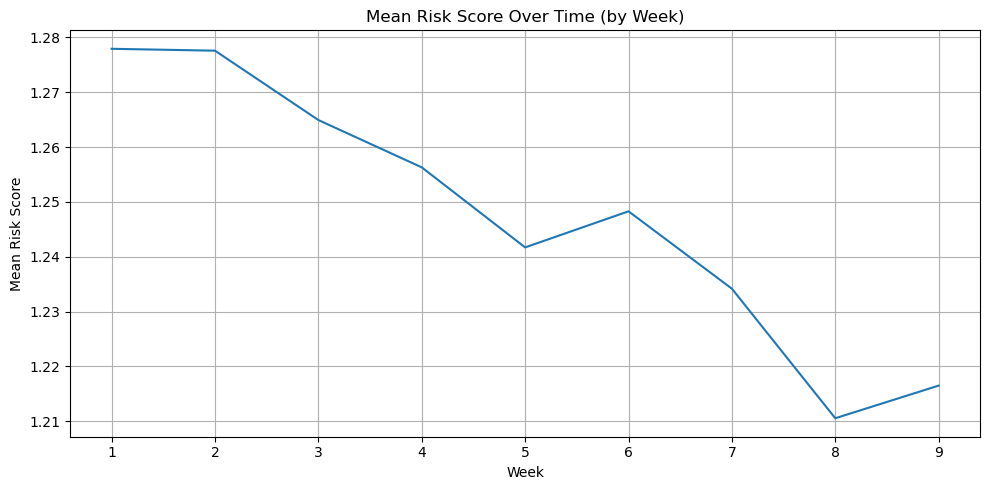

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxTimeVaryingFitter
import numpy as np
from sklearn.preprocessing import StandardScaler
# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("time_varying_with_all_changes.csv", low_memory=False)
# 2. ÎÇ†ÏßúÌòï Î≥ÄÌôò Î∞è Í∏∞Ï§ÄÏùº ÏÑ§Ï†ï
df["start_date"] = pd.to_datetime(df["start_date"])
df["stop_date"] = pd.to_datetime(df["stop_date"])
start_point = df["start_date"].min()
df["start"] = (df["start_date"] - start_point).dt.days
df["stop"] = (df["stop_date"] - start_point).dt.days

# 3. Ï£ºÏ∞® ÏÉùÏÑ± (Ï†ïÏÉÅ Ï£ºÏ∞® ÌùêÎ¶Ñ ÌååÏïÖÏö©)
df["week"] = ((df["start_date"] - start_point).dt.days // 7) + 1
df = df[df["week"] <= 9]
# 4. Ïù∏Í∏∞ÎèÑ Î°úÍ∑∏Î≥ÄÌôò
df["popularity_change_log"] = df["popularity_change"].apply(
    lambda x: np.sign(x) * np.log1p(abs(x)) if pd.notnull(x) else 0
)

# 5. ÏÇ¨Ïö©Ìï† ÌîºÏ≤ò
features_final = [
    "popularity_change_log",
    "authentic_sum_change",
    "guild_flag",
    "liberation_flag"
]

# 6. ÏïàÏ†ïÌôî Ï≤òÎ¶¨
for col in features_final:
    df[col] = df[col].clip(-1000, 1000)

scaler = StandardScaler()
df[features_final] = scaler.fit_transform(df[features_final])

# 7. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
df_cleaned = df[["ocid", "start", "stop", "event", "week"] + features_final].copy()
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna()

# 8. Î™®Îç∏ ÌïôÏäµ
ctv = CoxTimeVaryingFitter()
ctv.fit(df_cleaned.drop(columns=["week"]), id_col="ocid", start_col="start", stop_col="stop", event_col="event")
# Í≤∞Í≥º Ï∂úÎ†•
ctv.print_summary()
# 9. ÏúÑÌóòÎèÑ ÏòàÏ∏°
df_cleaned["risk_score"] = ctv.predict_partial_hazard(df_cleaned[features_final])

# 10. Ï†ïÏÉÅ Ï£ºÏ∞® Í∏∞Ï§Ä ÏúÑÌóòÎèÑ ÏãúÍ≥ÑÏó¥
risk_by_week = df_cleaned.groupby("week")["risk_score"].mean().reset_index()

# 11. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
sns.lineplot(data=risk_by_week, x="week", y="risk_score")
plt.title("Mean Risk Score Over Time (by Week)")
plt.xlabel("Week")
plt.ylabel("Mean Risk Score")
plt.grid(True)
plt.tight_layout()
plt.show()

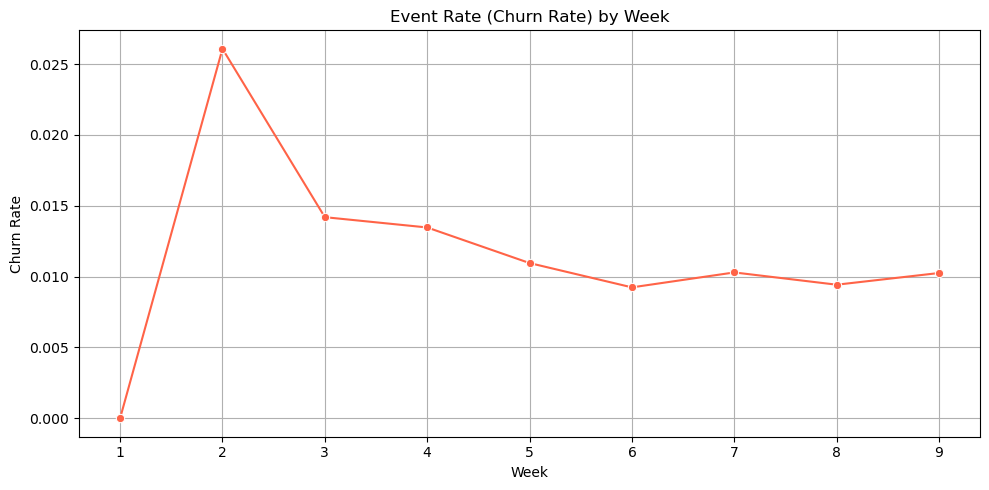

In [14]:
# Ï£ºÏ∞®Î≥Ñ event Î∞úÏÉùÎ•† Í≥ÑÏÇ∞
event_by_week = df_cleaned.groupby("week")["event"].agg(["sum", "count"]).reset_index()
event_by_week["event_rate"] = event_by_week["sum"] / event_by_week["count"]

# ÏãúÍ∞ÅÌôî: Ïù¥ÌÉàÎ•†
plt.figure(figsize=(10, 5))
sns.lineplot(data=event_by_week, x="week", y="event_rate", marker="o", color="tomato")
plt.title("Event Rate (Churn Rate) by Week")
plt.xlabel("Week")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.tight_layout()
plt.show()




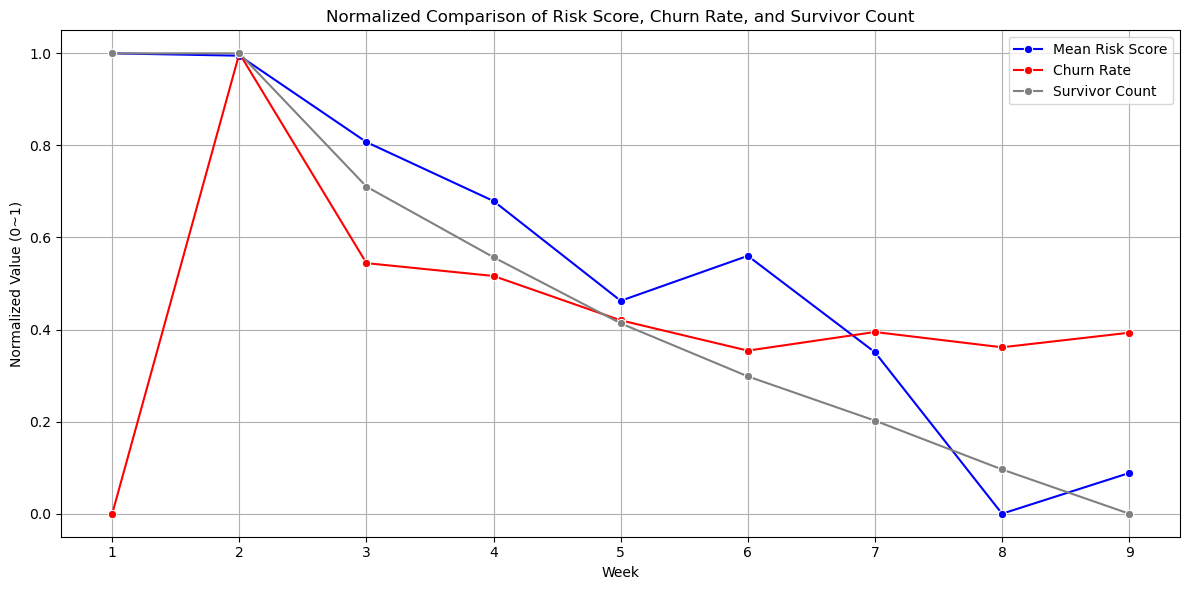

In [20]:
# 1. Ï£ºÏ∞®Î≥Ñ ÏöîÏïΩ: risk_score, churn_rate, survivor_count
summary_by_week = df_cleaned.groupby("week").agg({
    "risk_score": "mean",
    "event": "mean",           # Ïù¥ÌÉàÎ•†
    "ocid": "nunique"          # ÏÉùÏ°¥Ïûê Ïàò
}).reset_index()

summary_by_week.columns = ["week", "mean_risk_score", "churn_rate", "survivor_count"]

# Ï†ïÍ∑úÌôî Ìï®Ïàò
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

# Í∞Å Ïª¨Îüº Ï†ïÍ∑úÌôî
summary_norm = summary_by_week.copy()
summary_norm["risk_score_norm"] = normalize(summary_by_week["mean_risk_score"])
summary_norm["churn_rate_norm"] = normalize(summary_by_week["churn_rate"])
summary_norm["survivor_norm"] = normalize(summary_by_week["survivor_count"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.lineplot(data=summary_norm, x="week", y="risk_score_norm", label="Mean Risk Score", marker="o", color="blue")
sns.lineplot(data=summary_norm, x="week", y="churn_rate_norm", label="Churn Rate", marker="o", color="red")
sns.lineplot(data=summary_norm, x="week", y="survivor_norm", label="Survivor Count", marker="o", color="gray")

plt.title("Normalized Comparison of Risk Score, Churn Rate, and Survivor Count")
plt.xlabel("Week")
plt.ylabel("Normalized Value (0~1)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
df_cleaned[df_cleaned["week"] == 8][features_final].mean()


popularity_change_log    0.008294
authentic_sum_change     0.055344
guild_flag               0.007836
liberation_flag          0.063030
dtype: float64

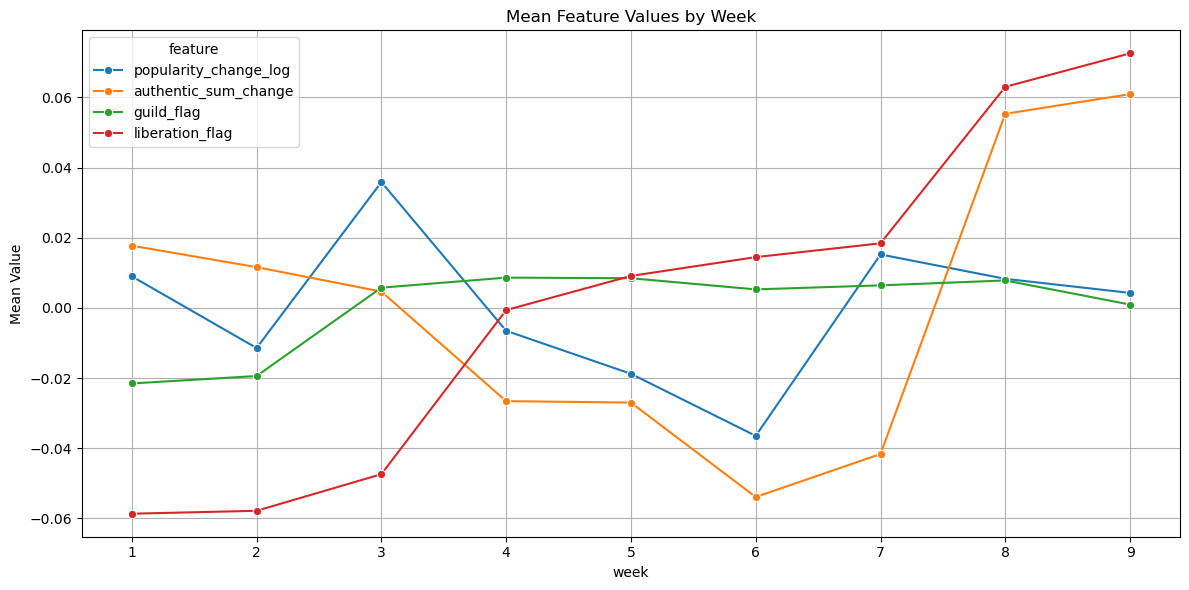

In [17]:
# Ï£ºÏ∞®Î≥Ñ ÌèâÍ∑† ÌîºÏ≤ò Í∞í Í≥ÑÏÇ∞
feature_means_by_week = df_cleaned.groupby("week")[[
    "popularity_change_log", "authentic_sum_change", "guild_flag", "liberation_flag"
]].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame for easier lineplotting
feature_means_melted = feature_means_by_week.melt(id_vars="week", var_name="feature", value_name="mean_value")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=feature_means_melted, x="week", y="mean_value", hue="feature", marker="o")
plt.title("Mean Feature Values by Week")
plt.ylabel("Mean Value")
plt.grid(True)
plt.tight_layout()
plt.show()


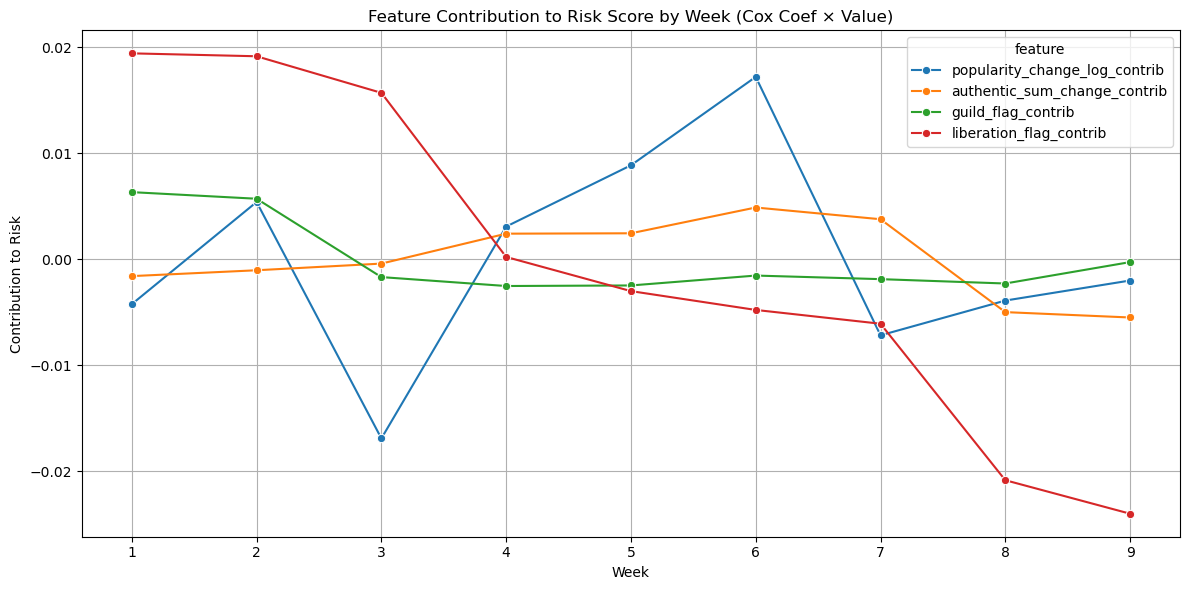

In [18]:
# üìå ÌîºÏ≤ò Í∏∞Ïó¨ÎèÑ Í≥ÑÏÇ∞: coef * Ìï¥Îãπ Ï£ºÏ∞® ÌîºÏ≤ò Í∞í
contrib_df = df_cleaned.copy()
for col in features_final:
    contrib_df[f"{col}_contrib"] = ctv.params_[col] * contrib_df[col]

# üìä Ï£ºÏ∞®Î≥Ñ ÌèâÍ∑† Í∏∞Ïó¨ÎèÑ Í≥ÑÏÇ∞
contrib_summary = contrib_df.groupby("week")[
    [f"{col}_contrib" for col in features_final]
].mean().reset_index()

# üìà ÏãúÍ∞ÅÌôî: Ï£ºÏ∞®Î≥Ñ Í∏∞Ïó¨ÎèÑ Î≥ÄÌôî (lineplot ÌòïÌÉú)
contrib_melted = contrib_summary.melt(id_vars="week", var_name="feature", value_name="contribution")

plt.figure(figsize=(12, 6))
sns.lineplot(data=contrib_melted, x="week", y="contribution", hue="feature", marker="o")
plt.title("Feature Contribution to Risk Score by Week (Cox Coef √ó Value)")
plt.xlabel("Week")
plt.ylabel("Contribution to Risk")
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
ocid_target = "2f70c853829c5d4538e7acb25e07d6c3"

# ocid Ìè¨Ìï® Ïó¨Î∂Ä ÌôïÏù∏
print("‚úÖ Ìè¨Ìï® Ïó¨Î∂Ä:", ocid_target in df_cleaned["ocid"].values)

# Ìï¥Îãπ ocidÏùò Îç∞Ïù¥ÌÑ∞ Ï∂úÎ†•
df_cleaned[df_cleaned["ocid"] == ocid_target]


‚úÖ Ìè¨Ìï® Ïó¨Î∂Ä: True


ocid  start  stop  event  week  \
332039  2f70c853829c5d4538e7acb25e07d6c3      0     7      0     1   
332040  2f70c853829c5d4538e7acb25e07d6c3      7    14      0     2   
332041  2f70c853829c5d4538e7acb25e07d6c3     14    21      0     3   
332042  2f70c853829c5d4538e7acb25e07d6c3     21    28      0     4   
332043  2f70c853829c5d4538e7acb25e07d6c3     28    35      0     5   
332044  2f70c853829c5d4538e7acb25e07d6c3     35    42      0     6   
332045  2f70c853829c5d4538e7acb25e07d6c3     42    49      0     7   
332046  2f70c853829c5d4538e7acb25e07d6c3     49    56      0     8   
332047  2f70c853829c5d4538e7acb25e07d6c3     56    63      0     9   

        popularity_change_log  authentic_sum_change  guild_flag  \
332039               0.961211              0.829847    0.240965   
332040              -0.264914              1.891457    0.240965   
332041              -0.264914             -0.231764    0.240965   
332042              -0.264914             -0.231764    0.240965   
332043              -0.264914             -0.231764    0.240965   
332044              -0.264914             -0.231764    0.240965   
332045               0.961211             -0.231764    0.240965   
332046              -0.264914             -0.231764    0.240965   
332047               0.961211             -0.231764    0.240965   

        liberation_flag  risk_score  
332039        -0.795234    0.714942  
332040        -0.795234    1.157659  
332041        -0.795234    1.402326  
332042        -0.795234    1.402326  
332043        -0.795234    1.402326  
332044        -0.795234    1.402326  
332045        -0.795234    0.786873  
332046         1.257492    0.711143  
332047         1.257492    0.399037

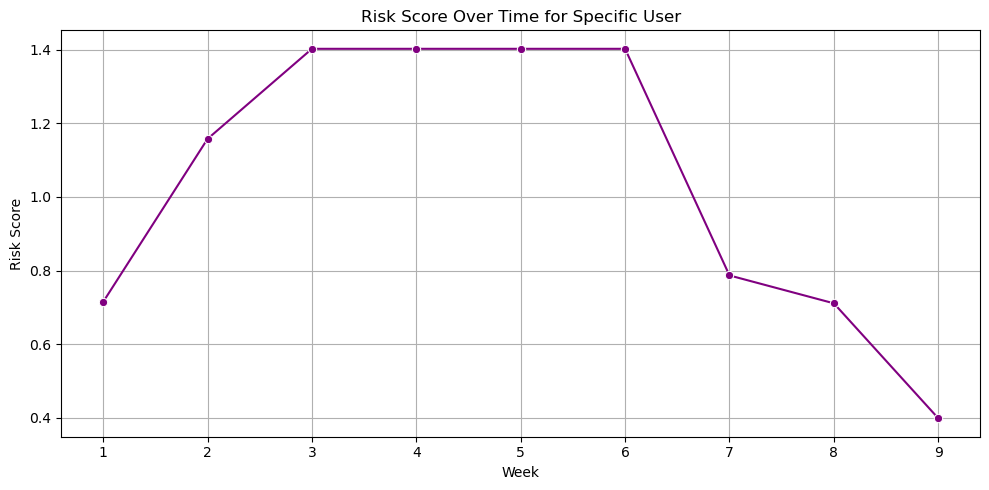

In [24]:
ocid_target = "2f70c853829c5d4538e7acb25e07d6c3"
user_df = df_cleaned[df_cleaned["ocid"] == ocid_target]

plt.figure(figsize=(10, 5))
sns.lineplot(data=user_df, x="week", y="risk_score", marker="o", color="purple")
plt.title("Risk Score Over Time for Specific User")
plt.xlabel("Week")
plt.ylabel("Risk Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
# Ïú†Ï†Ä Îç∞Ïù¥ÌÑ∞
ocid_target = "2f70c853829c5d4538e7acb25e07d6c3"
user_df = df_cleaned[df_cleaned["ocid"] == ocid_target].copy()

# Î™®Îç∏ Í≥ÑÏàò
coefs = ctv.params_[features_final]

# Ï£ºÏ∞®Î≥Ñ Í∏∞Ïó¨ÎèÑ Í≥ÑÏÇ∞ + risk_score Ìè¨Ìï®
rows = []
for _, row in user_df.iterrows():
    week = row["week"]
    risk_score = row["risk_score"]
    contrib = row[features_final] * coefs
    contrib["week"] = week
    contrib["risk_score"] = risk_score
    rows.append(contrib)

# Í≤∞Í≥º DataFrame
contrib_df = pd.DataFrame(rows)
contrib_df = contrib_df[["week", "risk_score"] + features_final]
contrib_df = contrib_df.sort_values("week").reset_index(drop=True)






In [51]:
# ÌÉÄÍ≤ü ocid
ocid_target = "2f70c853829c5d4538e7acb25e07d6c3"

# ÌïÑÏöîÌïú Ïª¨ÎüºÎßå ÏÑ†ÌÉù
cols = ["week", "start", "stop", "event", 
        "character_guild_name", "liberation_quest_clear_flag", 
        "popularity_change", "authentic_sum_change","authentic_sum_start","authentic_sum_stop" ]

# ÌïÑÌÑ∞ÎßÅ
user_info = df[df["ocid"] == ocid_target][cols].sort_values("week").reset_index(drop=True)

In [52]:
user_info 

week  start  stop  event character_guild_name  liberation_quest_clear_flag  \
0     1      0     7      0                   ÌôîÏõê                        False   
1     2      7    14      0                   ÌôîÏõê                        False   
2     3     14    21      0                   ÌôîÏõê                        False   
3     4     21    28      0                   ÌôîÏõê                        False   
4     5     28    35      0                   ÌôîÏõê                        False   
5     6     35    42      0                   ÌôîÏõê                        False   
6     7     42    49      0                   ÌôîÏõê                        False   
7     8     49    56      0                   ÌôîÏõê                         True   
8     9     56    63      0                   ÌôîÏõê                         True   

   popularity_change  authentic_sum_change  authentic_sum_start  \
0                1.0              0.829847                 25.0   
1                0.0              1.891457                 26.0   
2                0.0             -0.231764                 28.0   
3                0.0             -0.231764                 28.0   
4                0.0             -0.231764                 28.0   
5                0.0             -0.231764                 28.0   
6                1.0             -0.231764                 28.0   
7                0.0             -0.231764                 28.0   
8                1.0             -0.231764                 28.0   

   authentic_sum_stop  
0                26.0  
1                28.0  
2                28.0  
3                28.0  
4                28.0  
5                28.0  
6                28.0  
7                28.0  
8                28.0

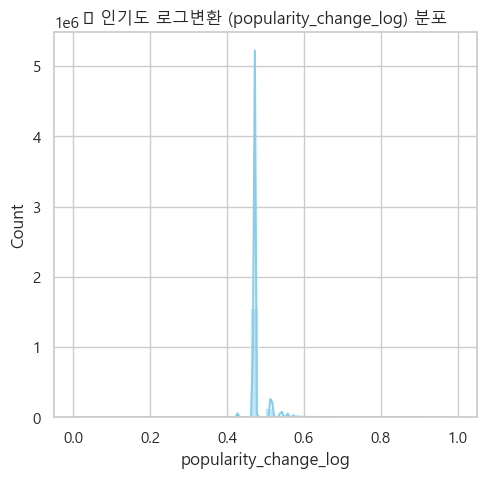

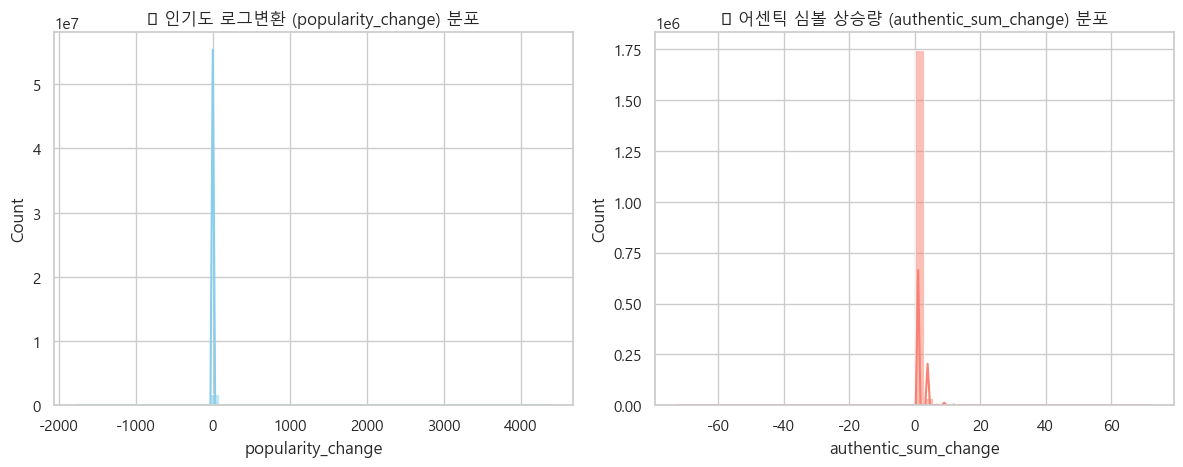

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ïù∏Í∏∞ÎèÑ Î°úÍ∑∏Î≥ÄÌôò Î∂ÑÌè¨
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned["popularity_change_log"], kde=True, bins=50, color="skyblue")
plt.title("üìä Ïù∏Í∏∞ÎèÑ Î°úÍ∑∏Î≥ÄÌôò (popularity_change_log) Î∂ÑÌè¨")
plt.xlabel("popularity_change_log")

# 1. Ïù∏Í∏∞ÎèÑ Î°úÍ∑∏Î≥ÄÌôò Î∂ÑÌè¨
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["popularity_change"], kde=True, bins=50, color="skyblue")
plt.title("üìä Ïù∏Í∏∞ÎèÑ Î≥ÄÌôî (popularity_change) Î∂ÑÌè¨")
plt.xlabel("popularity_change")
# 2. Ïã¨Î≥º ÏÉÅÏäπÎüâ Î∂ÑÌè¨
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned["authentic_sum_change"], kde=True, bins=50, color="salmon")
plt.title("üìä Ïñ¥ÏÑºÌã± Ïã¨Î≥º ÏÉÅÏäπÎüâ (authentic_sum_change) Î∂ÑÌè¨")
plt.xlabel("authentic_sum_change")

plt.tight_layout()
plt.show()


In [70]:
print("Í∏∏Îìú ÌîåÎûòÍ∑∏ Í∞í Î∂ÑÌè¨:")
print(df_cleaned["guild_flag"].value_counts())

print("\nÌï¥Î∞© ÌîåÎûòÍ∑∏ Í∞í Î∂ÑÌè¨:")
print(df_cleaned["liberation_flag"].value_counts())


Í∏∏Îìú ÌîåÎûòÍ∑∏ Í∞í Î∂ÑÌè¨:
guild_flag
1    1695226
0      98432
Name: count, dtype: int64

Ìï¥Î∞© ÌîåÎûòÍ∑∏ Í∞í Î∂ÑÌè¨:
liberation_flag
0    1098788
1     694870
Name: count, dtype: int64


In [77]:
# Ï†úÎ°ú vs ÏùºÎ∞ò ÏßÅÏóÖ Ïù∏Í∏∞ÎèÑ Î≥ÄÌôîÎüâ ÏöîÏïΩ ÌÜµÍ≥Ñ ÎπÑÍµê
zero_stats = df[df["is_zero"] == True]["popularity_change"].describe()
normal_stats = df[df["is_zero"] == False]["popularity_change"].describe()

# Îëê Í≤∞Í≥ºÎ•º ÌïòÎÇòÏùò DataFrameÏúºÎ°ú Ï†ïÎ¶¨
comparison_df = pd.DataFrame({
    "Ï†úÎ°ú": zero_stats,
    "ÏùºÎ∞ò ÏßÅÏóÖ": normal_stats
})
comparison_df

Ï†úÎ°ú         ÏùºÎ∞ò ÏßÅÏóÖ
count  42473.000000  1.751185e+06
mean       2.186118  1.304673e+00
std       55.176193  1.535485e+01
min      -24.000000 -1.752000e+03
25%        0.000000  0.000000e+00
50%        0.000000  0.000000e+00
75%        0.000000  0.000000e+00
max     4368.000000  2.332000e+03

<lifelines.CoxTimeVaryingFitter: fitted with 1793658 periods, 209179 subjects, 20789 events>
         event col = 'event'
number of subjects = 209179
 number of periods = 1793658
  number of events = 20789
partial log-likelihood = -248579.17
  time fit was run = 2025-05-02 02:26:12 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
popularity_log_zscore -0.47      0.62      0.01           -0.49           -0.45                0.61                0.64
authentic_sum_change  -0.10      0.91      0.00           -0.10           -0.09                0.90                0.91
guild_flag            -1.29      0.28      0.02           -1.32           -1.25                0.27                0.29
liberation_flag       -0.68      0.51      0.02           -0.71           -0.64                0.49                0.52

                       cmp to      z      p  -log2(p)
covariate                                            
popularity_log_zscore    0.00 -51.42 <0.005       inf
authentic_sum_change     0.00 -43.79 <0.005       inf
guild_flag               0.00 -73.40 <0.005       inf
liberation_flag          0.00 -38.68 <0.005       inf
---
Partial AIC = 497166.33
log-likelihood ratio test = 10073.44 on 4 df
-log2(p) of ll-ratio test = inf

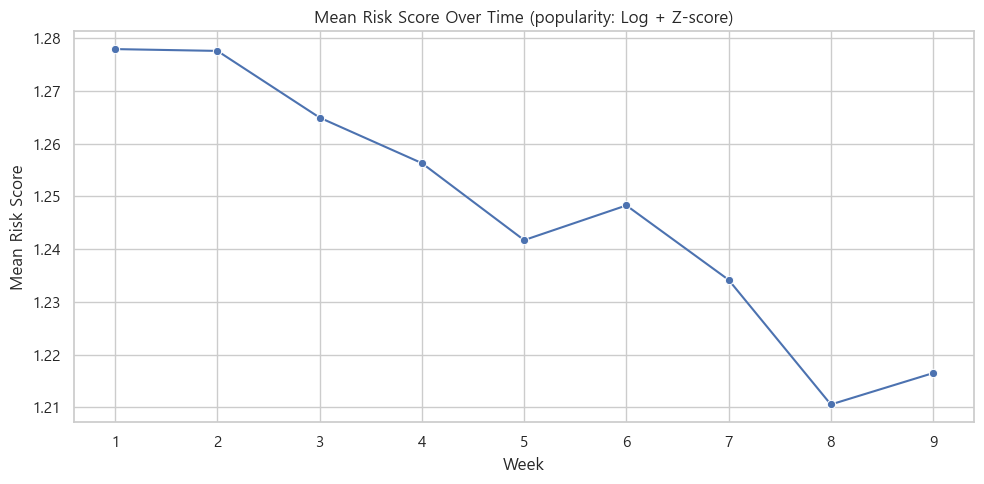

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxTimeVaryingFitter
import numpy as np

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("time_varying_with_all_changes.csv", low_memory=False)

# 2. ÎÇ†ÏßúÌòï Î≥ÄÌôò Î∞è Í∏∞Ï§ÄÏùº ÏÑ§Ï†ï
df["start_date"] = pd.to_datetime(df["start_date"])
df["stop_date"] = pd.to_datetime(df["stop_date"])
start_point = df["start_date"].min()
df["start"] = (df["start_date"] - start_point).dt.days
df["stop"] = (df["stop_date"] - start_point).dt.days

# 3. Ï£ºÏ∞® ÏÉùÏÑ±
df["week"] = ((df["start_date"] - start_point).dt.days // 7) + 1
df = df[df["week"] <= 9]

# 4. Ïù∏Í∏∞ÎèÑ: Î°úÍ∑∏Î≥ÄÌôò + Z-score Ï†ïÍ∑úÌôî
df["popularity_log"] = df["popularity_change"].apply(
    lambda x: np.sign(x) * np.log1p(abs(x)) if pd.notnull(x) else 0
)

mean_val = df["popularity_log"].mean()
std_val = df["popularity_log"].std()
df["popularity_log_zscore"] = (df["popularity_log"] - mean_val) / std_val

# 5. ÏÇ¨Ïö©Ìï† ÌîºÏ≤ò
features_final = [
    "popularity_log_zscore",     
    "authentic_sum_change",
    "guild_flag",
    "liberation_flag"
]

# 6. Í∑πÎã®Í∞í ÌÅ¥Î¶¨ÌïëÎßå Ïú†ÏßÄ
for col in features_final:
    df[col] = df[col].clip(-1000, 1000)

# 7. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
df_cleaned = df[["ocid", "start", "stop", "event", "week"] + features_final].copy()
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna()

# 8. Î™®Îç∏ ÌïôÏäµ
ctv = CoxTimeVaryingFitter()
ctv.fit(df_cleaned.drop(columns=["week"]), id_col="ocid", start_col="start", stop_col="stop", event_col="event")

# 9. ÏöîÏïΩ Ï∂úÎ†•
ctv.print_summary()

# 10. ÏúÑÌóòÎèÑ ÏòàÏ∏°
df_cleaned["risk_score"] = ctv.predict_partial_hazard(df_cleaned[features_final])

# 11. Ï£ºÏ∞®Î≥Ñ ÌèâÍ∑† ÏúÑÌóòÎèÑ ÏãúÍ∞ÅÌôî
risk_by_week = df_cleaned.groupby("week")["risk_score"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=risk_by_week, x="week", y="risk_score", marker="o")
plt.title("Mean Risk Score Over Time (popularity: Log + Z-score)")
plt.xlabel("Week")
plt.ylabel("Mean Risk Score")
plt.grid(True)
plt.tight_layout()
plt.show()


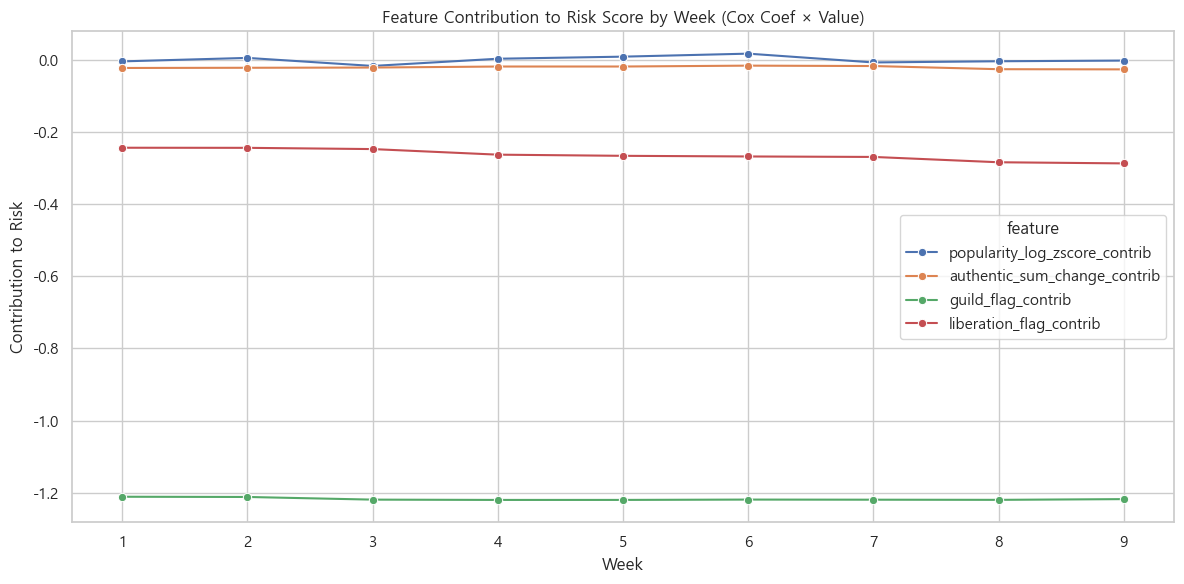

In [79]:
# ÌîºÏ≤ò Í∏∞Ïó¨ÎèÑ Í≥ÑÏÇ∞: coef * Ìï¥Îãπ Ï£ºÏ∞® ÌîºÏ≤ò Í∞í
contrib_df = df_cleaned.copy()
for col in features_final:
    contrib_df[f"{col}_contrib"] = ctv.params_[col] * contrib_df[col]

#  Ï£ºÏ∞®Î≥Ñ ÌèâÍ∑† Í∏∞Ïó¨ÎèÑ Í≥ÑÏÇ∞
contrib_summary = contrib_df.groupby("week")[
    [f"{col}_contrib" for col in features_final]
].mean().reset_index()

#  ÏãúÍ∞ÅÌôî: Ï£ºÏ∞®Î≥Ñ Í∏∞Ïó¨ÎèÑ Î≥ÄÌôî (lineplot ÌòïÌÉú)
contrib_melted = contrib_summary.melt(id_vars="week", var_name="feature", value_name="contribution")

plt.figure(figsize=(12, 6))
sns.lineplot(data=contrib_melted, x="week", y="contribution", hue="feature", marker="o")
plt.title("Feature Contribution to Risk Score by Week (Cox Coef √ó Value)")
plt.xlabel("Week")
plt.ylabel("Contribution to Risk")
plt.grid(True)
plt.tight_layout()
plt.show()


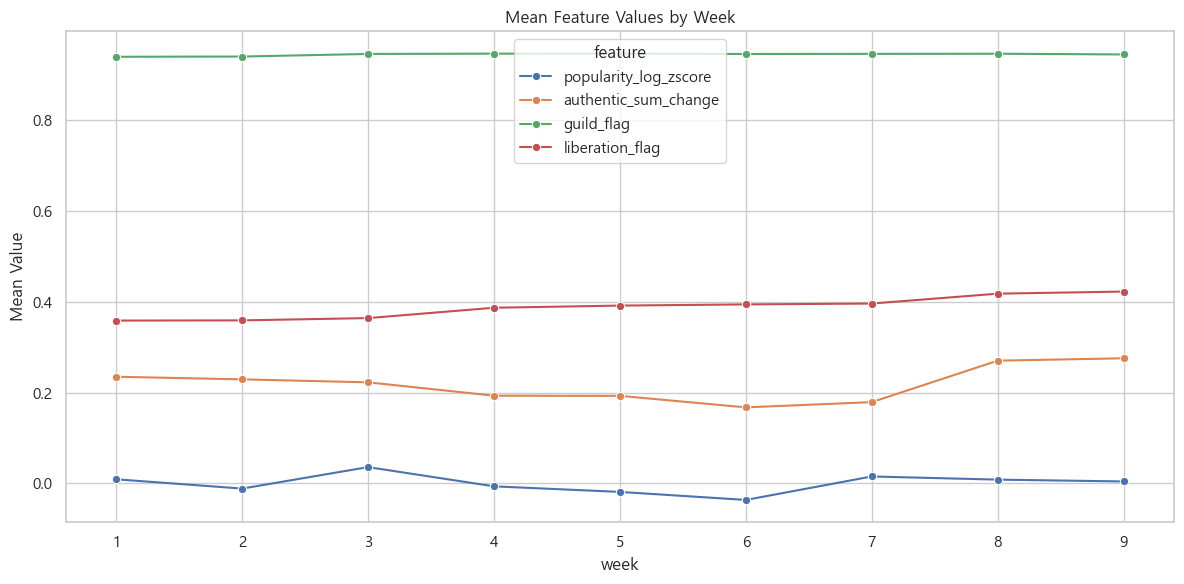

In [81]:
# Ï£ºÏ∞®Î≥Ñ ÌèâÍ∑† ÌîºÏ≤ò Í∞í Í≥ÑÏÇ∞
feature_means_by_week = df_cleaned.groupby("week")[[
    "popularity_log_zscore", "authentic_sum_change", "guild_flag", "liberation_flag"
]].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame for easier lineplotting
feature_means_melted = feature_means_by_week.melt(id_vars="week", var_name="feature", value_name="mean_value")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=feature_means_melted, x="week", y="mean_value", hue="feature", marker="o")
plt.title("Mean Feature Values by Week")
plt.ylabel("Mean Value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [82]:
# ÌÉÄÍ≤ü ocid
ocid_target = "2f70c853829c5d4538e7acb25e07d6c3"

# ÌïÑÏöîÌïú Ïª¨ÎüºÎßå ÏÑ†ÌÉù
cols = ["week", "start", "stop", "event", 
        "character_guild_name", "liberation_quest_clear_flag", 
        "popularity_change", "authentic_sum_change","authentic_sum_start","authentic_sum_stop" ]

# ÌïÑÌÑ∞ÎßÅ
user_info = df[df["ocid"] == ocid_target][cols].sort_values("week").reset_index(drop=True)

In [83]:
user_info 

week  start  stop  event character_guild_name  liberation_quest_clear_flag  \
0     1      0     7      0                   ÌôîÏõê                        False   
1     2      7    14      0                   ÌôîÏõê                        False   
2     3     14    21      0                   ÌôîÏõê                        False   
3     4     21    28      0                   ÌôîÏõê                        False   
4     5     28    35      0                   ÌôîÏõê                        False   
5     6     35    42      0                   ÌôîÏõê                        False   
6     7     42    49      0                   ÌôîÏõê                        False   
7     8     49    56      0                   ÌôîÏõê                         True   
8     9     56    63      0                   ÌôîÏõê                         True   

   popularity_change  authentic_sum_change  authentic_sum_start  \
0                1.0                   1.0                 25.0   
1                0.0                   2.0                 26.0   
2                0.0                   0.0                 28.0   
3                0.0                   0.0                 28.0   
4                0.0                   0.0                 28.0   
5                0.0                   0.0                 28.0   
6                1.0                   0.0                 28.0   
7                0.0                   0.0                 28.0   
8                1.0                   0.0                 28.0   

   authentic_sum_stop  
0                26.0  
1                28.0  
2                28.0  
3                28.0  
4                28.0  
5                28.0  
6                28.0  
7                28.0  
8                28.0

In [93]:
from scipy.stats import zscore

# 1. Ïú†Ï†Ä ID ÏÑ§Ï†ï
target_ocid = "2f70c853829c5d4538e7acb25e07d6c3"

# 2. Ïú†Ï†Ä Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
user_info = df[df["ocid"] == target_ocid].copy()

# 3. popularity Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ z-score Í≥ÑÏÇ∞
user_info["popularity_log"] = user_info["popularity_change"].apply(lambda x: np.sign(x) * np.log1p(abs(x)) if pd.notnull(x) else 0)
user_info["popularity_log_zscore"] = zscore(user_info["popularity_log"])

# 4. Cox Í≥ÑÏàò Í∞ÄÏ†∏Ïò§Í∏∞
coefs = dict(ctv.params_)

# 5. Í∞Å ÌîºÏ≤òÎ≥Ñ Í∏∞Ïó¨ÎèÑ Í≥ÑÏÇ∞
for col in features_final:
    user_info[col + "_contrib"] = user_info[col] * coefs[col]

# 6. Risk Score Í≥ÑÏÇ∞
user_info["risk_score"] = sum(user_info[col + "_contrib"] for col in features_final)

# 7. ÌôïÏù∏Ìï† Ïª¨ÎüºÎßå Ï†ïÎ¶¨
cols_to_show = [
    "week", "popularity_change", "popularity_log", "popularity_log_zscore",
    "authentic_sum_change", "guild_flag", "liberation_flag",
] + [col + "_contrib" for col in features_final] + ["risk_score"]

user_info[cols_to_show]


week  popularity_change  popularity_log  popularity_log_zscore  \
332039     1                1.0        0.693147               1.414214   
332040     2                0.0        0.000000              -0.707107   
332041     3                0.0        0.000000              -0.707107   
332042     4                0.0        0.000000              -0.707107   
332043     5                0.0        0.000000              -0.707107   
332044     6                0.0        0.000000              -0.707107   
332045     7                1.0        0.693147               1.414214   
332046     8                0.0        0.000000              -0.707107   
332047     9                1.0        0.693147               1.414214   

        authentic_sum_change  guild_flag  liberation_flag  \
332039                   1.0           1                0   
332040                   2.0           1                0   
332041                   0.0           1                0   
332042                   0.0           1                0   
332043                   0.0           1                0   
332044                   0.0           1                0   
332045                   0.0           1                0   
332046                   0.0           1                1   
332047                   0.0           1                1   

        popularity_log_zscore_contrib  authentic_sum_change_contrib  \
332039                      -0.666458                     -0.095866   
332040                       0.333229                     -0.191732   
332041                       0.333229                     -0.000000   
332042                       0.333229                     -0.000000   
332043                       0.333229                     -0.000000   
332044                       0.333229                     -0.000000   
332045                      -0.666458                     -0.000000   
332046                       0.333229                     -0.000000   
332047                      -0.666458                     -0.000000   

        guild_flag_contrib  liberation_flag_contrib  risk_score  
332039           -1.288165                -0.000000   -2.050490  
332040           -1.288165                -0.000000   -1.146668  
332041           -1.288165                -0.000000   -0.954936  
332042           -1.288165                -0.000000   -0.954936  
332043           -1.288165                -0.000000   -0.954936  
332044           -1.288165                -0.000000   -0.954936  
332045           -1.288165                -0.000000   -1.954624  
332046           -1.288165                -0.679013   -1.633949  
332047           -1.288165                -0.679013   -2.633637

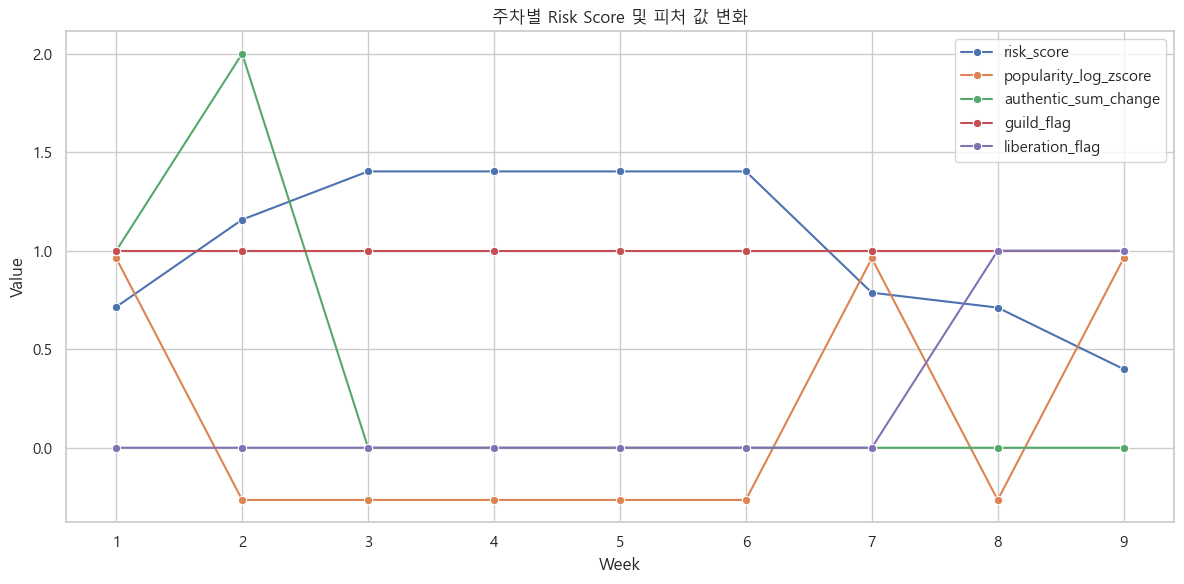

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Í∑∏ÎûòÌîÑÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: df_cleanedÏôÄ features_final Í∞ÄÏ†ï
features_final = [
    "popularity_log_zscore",
    "authentic_sum_change",
    "guild_flag",
    "liberation_flag"
]

# Ïú†Ï†Ä IDÎ•º ÏßÄÏ†ï (Ïù¥Ï†ÑÍ≥º ÎèôÏùºÌïú ÏòàÏãú)
target_ocid = "2f70c853829c5d4538e7acb25e07d6c3"

# Ìï¥Îãπ Ïú†Ï†ÄÏùò Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
user_df = df_cleaned[df_cleaned["ocid"] == target_ocid].copy()

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))

# risk_score ÏÑ†
sns.lineplot(data=user_df, x="week", y="risk_score", label="risk_score", marker="o")

# Í∞Å ÌîºÏ≤ò Í∑∏Î¶¨Í∏∞
for col in features_final:
    sns.lineplot(data=user_df, x="week", y=col, label=col, marker="o")

plt.title("Ï£ºÏ∞®Î≥Ñ Risk Score Î∞è ÌîºÏ≤ò Í∞í Î≥ÄÌôî")
plt.xlabel("Week")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

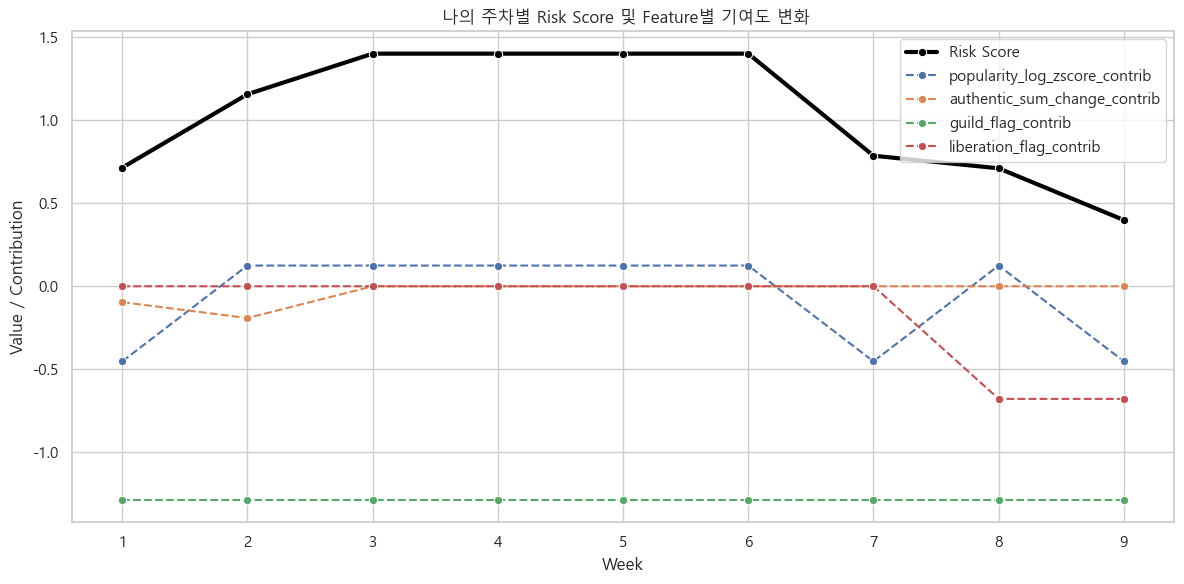

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cox Í≥ÑÏàò Í∞ÄÏ†∏Ïò§Í∏∞
coefs = dict(ctv.params_)

# Ïú†Ï†Ä ID
target_ocid = "2f70c853829c5d4538e7acb25e07d6c3"

# Ìï¥Îãπ Ïú†Ï†Ä Îç∞Ïù¥ÌÑ∞
user_df = df_cleaned[df_cleaned["ocid"] == target_ocid].copy()

# Í∏∞Ïó¨ÎèÑ Í≥ÑÏÇ∞
for col in features_final:
    user_df[col + "_contrib"] = user_df[col] * coefs[col]

# üìà Ìïú Í∑∏ÎûòÌîÑÏóê Ìï®Íªò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))

# ‚ë† Risk Score (ÍµµÏùÄ ÏÑ†)
sns.lineplot(data=user_df, x="week", y="risk_score", label="Risk Score", linewidth=3, marker="o", color="black")

# ‚ë° Í∞Å Feature Í∏∞Ïó¨ÎèÑ (ÏñáÏùÄ ÏÑ†)
for col in features_final:
    sns.lineplot(data=user_df, x="week", y=col + "_contrib", label=col + "_contrib", marker="o", linestyle="--")

# üßæ Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.title(" ÎÇòÏùò Ï£ºÏ∞®Î≥Ñ Risk Score Î∞è FeatureÎ≥Ñ Í∏∞Ïó¨ÎèÑ Î≥ÄÌôî")
plt.xlabel("Week")
plt.ylabel("Value / Contribution")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


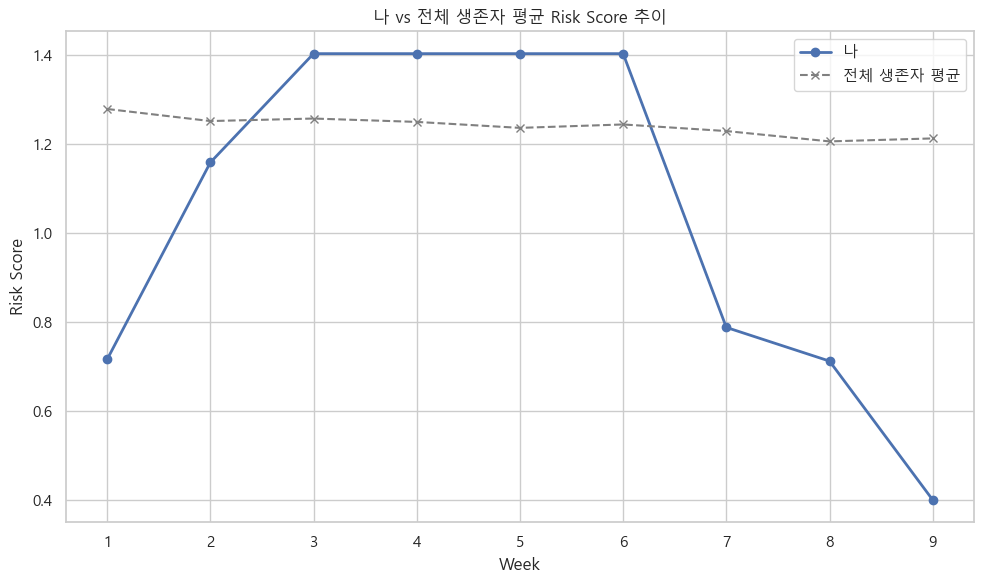

week  survivor_mean_risk   my_risk
0     1            1.277916  0.714942
1     2            1.250785  1.157659
2     3            1.256449  1.402326
3     4            1.248874  1.402326
4     5            1.235454  1.402326
5     6            1.243146  1.402326
6     7            1.228309  0.786873
7     8            1.205071  0.711143
8     9            1.211763  0.399037

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

#  ÎÑàÏùò OCID
your_ocid = "2f70c853829c5d4538e7acb25e07d6c3"

#  ÎÑàÏùò risk_score Ï∂îÏù¥
your_df = df_cleaned[df_cleaned["ocid"] == your_ocid][["week", "risk_score"]].rename(columns={"risk_score": "my_risk"})

#  Ï†ÑÏ≤¥ ÏÉùÏ°¥Ïûê ÌèâÍ∑† risk_score (event == 0)
survivor_mean = (
    df_cleaned[df_cleaned["event"] == 0]
    .groupby("week")["risk_score"]
    .mean()
    .reset_index()
    .rename(columns={"risk_score": "survivor_mean_risk"})
)

#  Î≥ëÌï©
compare_df = survivor_mean.merge(your_df, on="week", how="left")

#  ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(compare_df["week"], compare_df["my_risk"], label="ÎÇò", marker="o", linewidth=2)
plt.plot(compare_df["week"], compare_df["survivor_mean_risk"], label="Ï†ÑÏ≤¥ ÏÉùÏ°¥Ïûê ÌèâÍ∑†", marker="x", linestyle="--", color="gray")

plt.title("ÎÇò vs Ï†ÑÏ≤¥ ÏÉùÏ°¥Ïûê ÌèâÍ∑† Risk Score Ï∂îÏù¥")
plt.xlabel("Week")
plt.ylabel("Risk Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#  Ïà´ÏûêÎ°úÎèÑ ÌôïÏù∏ÌïòÍ≥† Ïã∂Îã§Î©¥
compare_df


In [104]:
# ÏãúÍ∞Ñ ÏÉÅÌò∏ÏûëÏö© Ìï≠ Ï∂îÍ∞Ä
for col in features_final:
    df_cleaned[f"{col}_x_time"] = df_cleaned[col] * df_cleaned["stop"]

# Îã§Ïãú ÌïôÏäµ
features_with_interaction = features_final + [f"{col}_x_time" for col in features_final]

ctv = CoxTimeVaryingFitter()
ctv.fit(df_cleaned[["ocid", "start", "stop", "event"] + features_with_interaction], 
        id_col="ocid", start_col="start", stop_col="stop", event_col="event")

ctv.print_summary()


<lifelines.CoxTimeVaryingFitter: fitted with 1793658 periods, 209179 subjects, 20789 events>
         event col = 'event'
number of subjects = 209179
 number of periods = 1793658
  number of events = 20789
partial log-likelihood = -248438.65
  time fit was run = 2025-05-02 05:07:30 UTC

---
                              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                     
popularity_log_zscore        -0.39      0.68      0.02           -0.43           -0.35                0.65                0.71
authentic_sum_change         -0.09      0.92      0.01           -0.10           -0.07                0.91                0.93
guild_flag                   -1.77      0.17      0.04           -1.85           -1.70                0.16                0.18
liberation_flag              -0.87      0.42      0.04           -0.95           -0.79                0.39                0.46
popularity_log_zscore_x_time -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
authentic_sum_change_x_time  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
guild_flag_x_time             0.02      1.02      0.00            0.01            0.02                1.01                1.02
liberation_flag_x_time        0.01      1.01      0.00            0.00            0.01                1.00                1.01

                              cmp to      z      p  -log2(p)
covariate                                                   
popularity_log_zscore           0.00 -18.00 <0.005    238.22
authentic_sum_change            0.00 -13.94 <0.005    144.38
guild_flag                      0.00 -46.95 <0.005       inf
liberation_flag                 0.00 -21.41 <0.005    335.28
popularity_log_zscore_x_time    0.00  -4.15 <0.005     14.86
authentic_sum_change_x_time     0.00  -1.69   0.09      3.45
guild_flag_x_time               0.00  13.92 <0.005    143.97
liberation_flag_x_time          0.00   5.10 <0.005     21.51
---
Partial AIC = 496893.31
log-likelihood ratio test = 10354.46 on 8 df
-log2(p) of ll-ratio test = inf

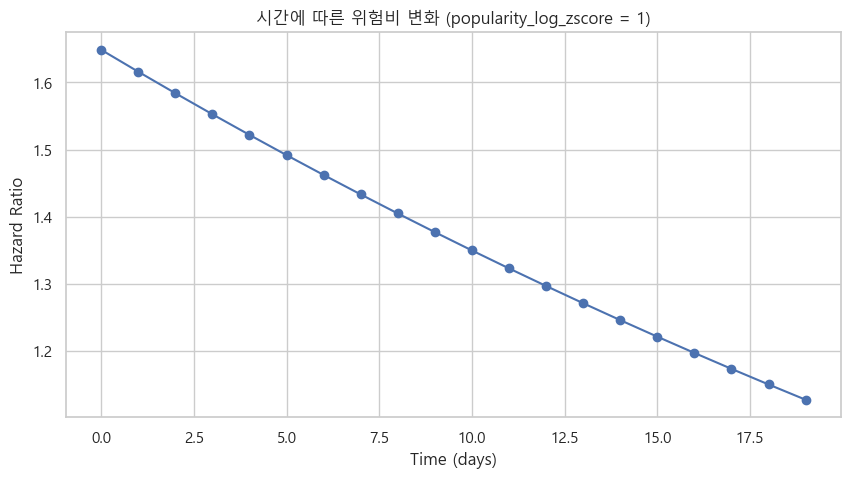

In [105]:
import matplotlib.pyplot as plt
import numpy as np

x = 1  # Ïù∏Í∏∞ÎèÑÍ∞Ä 1 Ï¶ùÍ∞ÄÌïú Ïú†Ï†Ä
t_range = np.arange(0, 20)
hr = np.exp(0.5 * x + (-0.02) * x * t_range)

plt.plot(t_range, hr, marker='o')
plt.title("ÏãúÍ∞ÑÏóê Îî∞Î•∏ ÏúÑÌóòÎπÑ Î≥ÄÌôî (popularity_log_zscore = 1)")
plt.xlabel("Time (days)")
plt.ylabel("Hazard Ratio")
plt.grid(True)
plt.show()


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxTimeVaryingFitter

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
df = pd.read_csv("time_varying_with_all_changes.csv")

# ÎÇ†Ïßú ‚Üí ÏùºÏàò Î≥ÄÌôò
df["start_date"] = pd.to_datetime(df["start_date"])
df["stop_date"] = pd.to_datetime(df["stop_date"])
start_point = df["start_date"].min()
df["start"] = (df["start_date"] - start_point).dt.days
df["stop"] = (df["stop_date"] - start_point).dt.days

# Î°úÍ∑∏Î≥ÄÌôò + Z-score
df["popularity_log"] = df["popularity_change"].apply(lambda x: np.sign(x) * np.log1p(abs(x)) if pd.notnull(x) else 0)
mean_val = df["popularity_log"].mean()
std_val = df["popularity_log"].std()
df["popularity_log_zscore"] = (df["popularity_log"] - mean_val) / std_val

# ÏÇ¨Ïö©Ìï† Î≥ÄÏàò
features = [
    "popularity_log_zscore",     
    "authentic_sum_change",
    "guild_flag",
    "liberation_flag"
]

# ÏãúÍ∞Ñ-ÏÉÅÌò∏ÏûëÏö© Ìï≠ Ï∂îÍ∞Ä
for col in features:
    df[f"{col}_x_time"] = df[col] * df["stop"]

# ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
cols_for_model = ["ocid", "start", "stop", "event"] + features + [f"{col}_x_time" for col in features]
df_cleaned = df[cols_for_model].replace([np.inf, -np.inf], np.nan).dropna()

# Cox Î™®Îç∏ ÌïôÏäµ
ctv = CoxTimeVaryingFitter()
ctv.fit(df_cleaned, id_col="ocid", start_col="start", stop_col="stop", event_col="event")
ctv.print_summary()


<lifelines.CoxTimeVaryingFitter: fitted with 1793659 periods, 209179 subjects, 20789 events>
         event col = 'event'
number of subjects = 209179
 number of periods = 1793659
  number of events = 20789
partial log-likelihood = -248438.65
  time fit was run = 2025-05-02 05:19:07 UTC

---
                              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                     
popularity_log_zscore        -0.39      0.68      0.02           -0.43           -0.35                0.65                0.71
authentic_sum_change         -0.09      0.92      0.01           -0.10           -0.07                0.91                0.93
guild_flag                   -1.77      0.17      0.04           -1.85           -1.70                0.16                0.18
liberation_flag              -0.87      0.42      0.04           -0.95           -0.79                0.39                0.46
popularity_log_zscore_x_time -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
authentic_sum_change_x_time  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
guild_flag_x_time             0.02      1.02      0.00            0.01            0.02                1.01                1.02
liberation_flag_x_time        0.01      1.01      0.00            0.00            0.01                1.00                1.01

                              cmp to      z      p  -log2(p)
covariate                                                   
popularity_log_zscore           0.00 -18.00 <0.005    238.22
authentic_sum_change            0.00 -13.94 <0.005    144.38
guild_flag                      0.00 -46.95 <0.005       inf
liberation_flag                 0.00 -21.41 <0.005    335.28
popularity_log_zscore_x_time    0.00  -4.15 <0.005     14.86
authentic_sum_change_x_time     0.00  -1.69   0.09      3.45
guild_flag_x_time               0.00  13.92 <0.005    143.97
liberation_flag_x_time          0.00   5.10 <0.005     21.51
---
Partial AIC = 496893.31
log-likelihood ratio test = 10354.46 on 8 df
-log2(p) of ll-ratio test = inf

In [107]:
# ÎåÄÏÉÅ Ïú†Ï†Ä
target_ocid = "2f70c853829c5d4538e7acb25e07d6c3"
user_df = df_cleaned[df_cleaned["ocid"] == target_ocid].copy()

# ÏúÑÌóòÏä§ÏΩîÏñ¥ Í≥ÑÏÇ∞
user_df["risk_score"] = ctv.predict_partial_hazard(user_df)


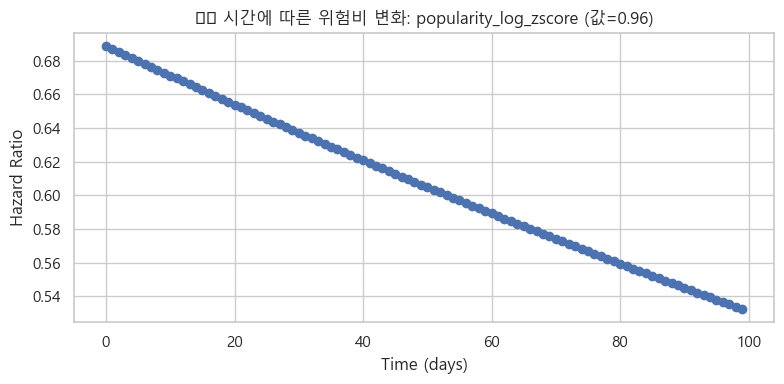

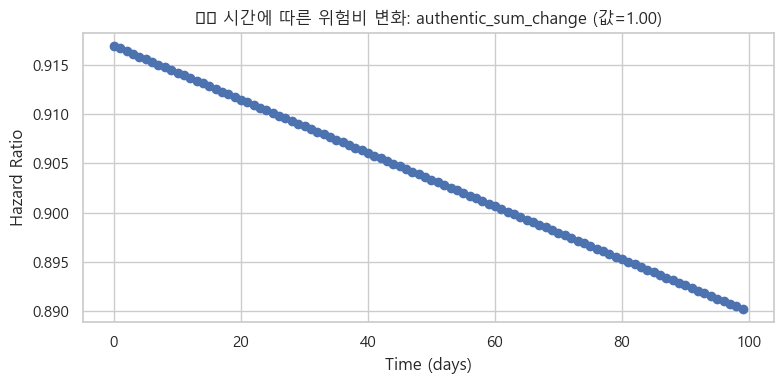

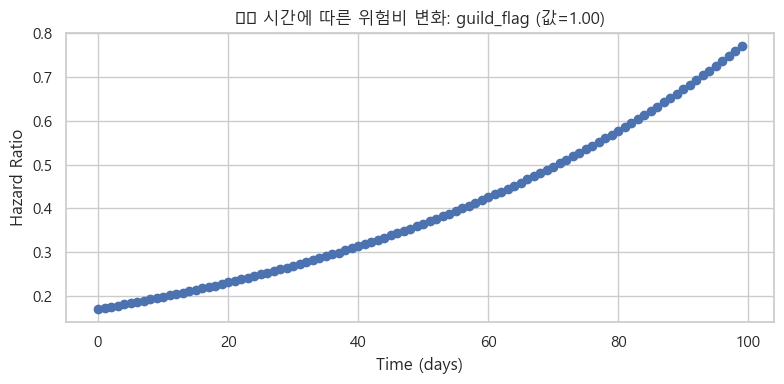

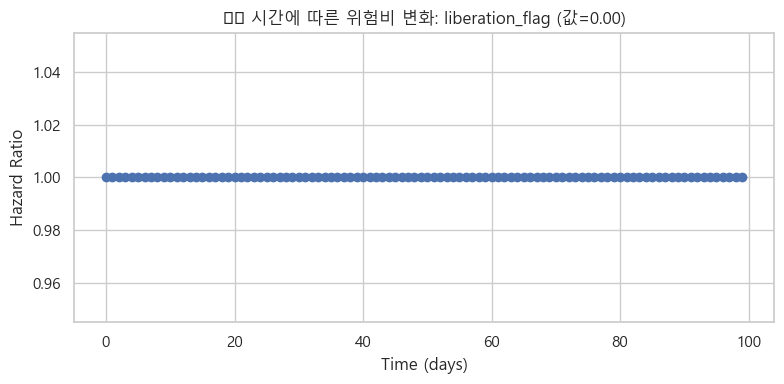

In [109]:
target_ocid = "2f70c853829c5d4538e7acb25e07d6c3"
user_df = df_cleaned[df_cleaned["ocid"] == target_ocid].copy()

features = [
    "popularity_log_zscore",     
    "authentic_sum_change",
    "guild_flag",
    "liberation_flag"
]

plot_time_dependent_hazard(user_df, ctv, features)


In [108]:
import numpy as np
import matplotlib.pyplot as plt

def plot_time_dependent_hazard(user_df, model, features, t_range=100):
    """
    ÏãúÍ∞ÑÏóê Îî∞Îùº ÏúÑÌóòÎπÑ(Hazard Ratio)Í∞Ä Ïñ¥ÎñªÍ≤å Î≥ÄÌïòÎäîÏßÄ Î≥ÄÏàòÎ≥ÑÎ°ú ÏãúÍ∞ÅÌôî
    
    Parameters:
    - user_df: Îã®Ïùº Ïú†Ï†ÄÏóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞ (DataFrame)
    - model: ÌïôÏäµÎêú CoxTimeVaryingFitter Í∞ùÏ≤¥
    - features: ÏãúÍ∞Ñ-ÏÉÅÌò∏ÏûëÏö© Ìï≠ÏùÑ Ìè¨Ìï®Ìïú Ï£ºÏöî Î≥ÄÏàò Î¶¨Ïä§Ìä∏
    - t_range: ÏãúÍ∞Ñ Î≤îÏúÑ (days)
    """
    t = np.arange(0, t_range)

    for col in features:
        # Ìï¥Îãπ Ïú†Ï†ÄÏùò Í∞í
        x = user_df[col].iloc[0]
        
        # coef + ÏãúÍ∞ÑÌï≠Ïù¥ ÏóÜÏúºÎ©¥ Í±¥ÎÑàÎúÄ
        coef_name = col
        coef_time_name = f"{col}_x_time"
        if coef_name not in model.params_ or coef_time_name not in model.params_:
            continue
        
        coef = model.params_[coef_name]
        coef_time = model.params_[coef_time_name]

        # ÏãúÍ∞ÑÏóê Îî∞Î•∏ HR Í≥ÑÏÇ∞
        hr = np.exp(coef * x + coef_time * x * t)

        # ÏãúÍ∞ÅÌôî
        plt.figure(figsize=(8, 4))
        plt.plot(t, hr, marker="o")
        plt.title(f"‚è±Ô∏è ÏãúÍ∞ÑÏóê Îî∞Î•∏ ÏúÑÌóòÎπÑ Î≥ÄÌôî: {col} (Í∞í={x:.2f})")
        plt.xlabel("Time (days)")
        plt.ylabel("Hazard Ratio")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [111]:
print(f" Ïú†Ï†Ä {target_ocid[:6]}... Ïùò ÏµúÏã† ÏúÑÌóò Ïä§ÏΩîÏñ¥ Î∂ÑÏÑù:")
latest = user_df.sort_values("stop", ascending=False).iloc[0]

for col in features:
    val = latest[col]
    coef = ctv.params_[col]
    contrib = coef * val
    print(f" - {col:25}: {val:>6.2f} √ó {coef:>6.2f} = {contrib:>6.2f}")


üîç Ïú†Ï†Ä 2f70c8... Ïùò ÏµúÏã† ÏúÑÌóò Ïä§ÏΩîÏñ¥ Î∂ÑÏÑù:
 - popularity_log_zscore    :   0.96 √ó  -0.39 =  -0.37
 - authentic_sum_change     :   0.00 √ó  -0.09 =  -0.00
 - guild_flag               :   1.00 √ó  -1.77 =  -1.77
 - liberation_flag          :   1.00 √ó  -0.87 =  -0.87


In [113]:
# ÌïÑÏàò: df_cleanedÏóêÎäî Î™®Îì† Ïú†Ï†ÄÏùò start~stop Ï£ºÏ∞®Î≥Ñ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏñ¥Ïïº Ìï®
df_cleaned["risk_score"] = ctv.predict_partial_hazard(df_cleaned)


In [114]:
# ÏµúÏã† stop Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨ ÌõÑ groupbyÎ°ú ÏµúÏã† row Ï∂îÏ∂ú
latest_risk_df = df_cleaned.sort_values(["ocid", "stop"], ascending=[True, False]) \
                            .groupby("ocid", as_index=False).first()


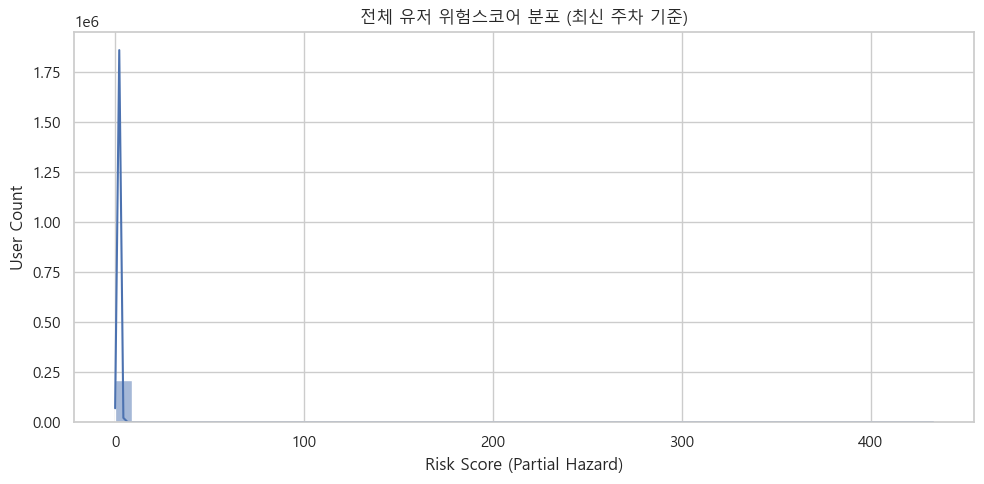

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(latest_risk_df["risk_score"], bins=50, kde=True)
plt.title("Ï†ÑÏ≤¥ Ïú†Ï†Ä ÏúÑÌóòÏä§ÏΩîÏñ¥ Î∂ÑÌè¨ (ÏµúÏã† Ï£ºÏ∞® Í∏∞Ï§Ä)")
plt.xlabel("Risk Score (Partial Hazard)")
plt.ylabel("User Count")
plt.grid(True)
plt.tight_layout()
plt.show()


In [116]:
# ÏÉÅÏúÑ 5% ÏúÑÌóò Ïú†Ï†Ä
top_risk = latest_risk_df.sort_values("risk_score", ascending=False).head(10)

# ÌïòÏúÑ 5% ÏïàÏ†ï Ïú†Ï†Ä
low_risk = latest_risk_df.sort_values("risk_score", ascending=True).head(10)

# ÏúÑÌóòÏä§ÏΩîÏñ¥ + Î≥ÄÏàò Í∏∞Ïó¨ÎèÑ ÌôïÏù∏
top_risk = top_risk[["ocid", "risk_score", "popularity_log_zscore", "authentic_sum_change", "guild_flag", "liberation_flag"]]
low_risk = low_risk[["ocid", "risk_score", "popularity_log_zscore", "authentic_sum_change", "guild_flag", "liberation_flag"]]


In [129]:
import pandas as pd

# ÌïôÏäµÎêú Î™®Îç∏(ctv)Í≥º df_cleanedÍ∞Ä Ïù¥ÎØ∏ ÏûàÎã§Í≥† Í∞ÄÏ†ï
# ÏúÑÌóòÏä§ÏΩîÏñ¥ Í≥ÑÏÇ∞
df_cleaned["risk_score"] = ctv.predict_partial_hazard(df_cleaned)

# Ïú†Ï†ÄÎ≥Ñ ÏµúÏã† rowÎßå Ï∂îÏ∂ú
latest_df = df_cleaned.sort_values(["ocid", "stop"], ascending=[True, False]).groupby("ocid", as_index=False).first()

# ÏÉÅÏúÑ/ÌïòÏúÑ 1~2Î™Ö ÏÉòÌîåÎßÅ
top_risk_users = latest_df.sort_values("risk_score", ascending=False).head(2)
low_risk_users = latest_df.sort_values("risk_score", ascending=True).head(2)

# Ï£ºÏöî Î≥ÄÏàò
features = ["popularity_log_zscore", "authentic_sum_change", "guild_flag", "liberation_flag"]

# Ìï¥ÏÑù Î¶¨Ìè¨Ìä∏ ÏÉùÏÑ± Ìï®Ïàò
def generate_report(row, model, features):
    lines = []
    lines.append(f" Ïú†Ï†Ä {row['ocid'][:6]}... | Risk Score: {row['risk_score']:.4f}")
    lines.append(" ÏúÑÌóò Í∏∞Ïó¨ÎèÑ Î∂ÑÏÑù:")
    total_log_risk = 0
    stop_time = row["stop"]
    for col in features:
        base = row[col]
        time_term = row[col] * stop_time
        coef = model.params_[col]
        coef_time = model.params_[f"{col}_x_time"]
        contrib = coef * base + coef_time * time_term
        total_log_risk += contrib
        lines.append(f" - {col:25}: {base:>6.2f} √ó {coef:>6.2f} + time √ó {coef_time:>6.3f} ‚Üí Í∏∞Ïó¨ÎèÑ {contrib:>6.2f}")
    lines.append(f" Ï†ÑÏ≤¥ log ÏúÑÌóòÎèÑ: {total_log_risk:.4f} ‚Üí exp = {np.exp(total_log_risk):.4f}")
    return "\n".join(lines)
# ÏòàÏãú: ÏÉÅÏúÑ ÏúÑÌóò Ïú†Ï†Ä Ìï¥ÏÑù Î¶¨Ìè¨Ìä∏ Ï∂úÎ†•
for report in top_reports:
    print(report)
    print("\n" + "-" * 80 + "\n")

# ÌïòÏúÑ ÏúÑÌóò Ïú†Ï†ÄÎèÑ ÎßàÏ∞¨Í∞ÄÏßÄ
for report in low_reports:
    print(report)
    print("\n" + "-" * 80 + "\n")



üßç Ïú†Ï†Ä ab23f6... | Risk Score: 432.9145
üìä ÏúÑÌóò Í∏∞Ïó¨ÎèÑ Î∂ÑÏÑù:
 - popularity_log_zscore    :  -0.26 √ó  -0.39 + time √ó -0.003 ‚Üí Í∏∞Ïó¨ÎèÑ   0.15
 - authentic_sum_change     : -55.00 √ó  -0.09 + time √ó -0.000 ‚Üí Í∏∞Ïó¨ÎèÑ   5.80
 - guild_flag               :   1.00 √ó  -1.77 + time √ó  0.015 ‚Üí Í∏∞Ïó¨ÎèÑ  -0.81
 - liberation_flag          :   1.00 √ó  -0.87 + time √ó  0.005 ‚Üí Í∏∞Ïó¨ÎèÑ  -0.53
üìå Ï†ÑÏ≤¥ log ÏúÑÌóòÎèÑ: 4.6090 ‚Üí exp = 100.3792

--------------------------------------------------------------------------------

üßç Ïú†Ï†Ä b3c60d... | Risk Score: 206.8008
üìä ÏúÑÌóò Í∏∞Ïó¨ÎèÑ Î∂ÑÏÑù:
 - popularity_log_zscore    :  -0.26 √ó  -0.39 + time √ó -0.003 ‚Üí Í∏∞Ïó¨ÎèÑ   0.15
 - authentic_sum_change     : -48.00 √ó  -0.09 + time √ó -0.000 ‚Üí Í∏∞Ïó¨ÎèÑ   5.07
 - guild_flag               :   1.00 √ó  -1.77 + time √ó  0.015 ‚Üí Í∏∞Ïó¨ÎèÑ  -0.81
 - liberation_flag          :   1.00 √ó  -0.87 + time √ó  0.005 ‚Üí Í∏∞Ïó¨ÎèÑ  -0.53
üìå Ï†ÑÏ≤¥ log ÏúÑÌóòÎèÑ: 3.8702 

In [122]:
target_ocid = "2f70c853829c5d4538e7acb25e07d6c3"
user_df = df_cleaned[df_cleaned["ocid"] == target_ocid].copy()
user_df["risk_score"] = ctv.predict_partial_hazard(user_df)


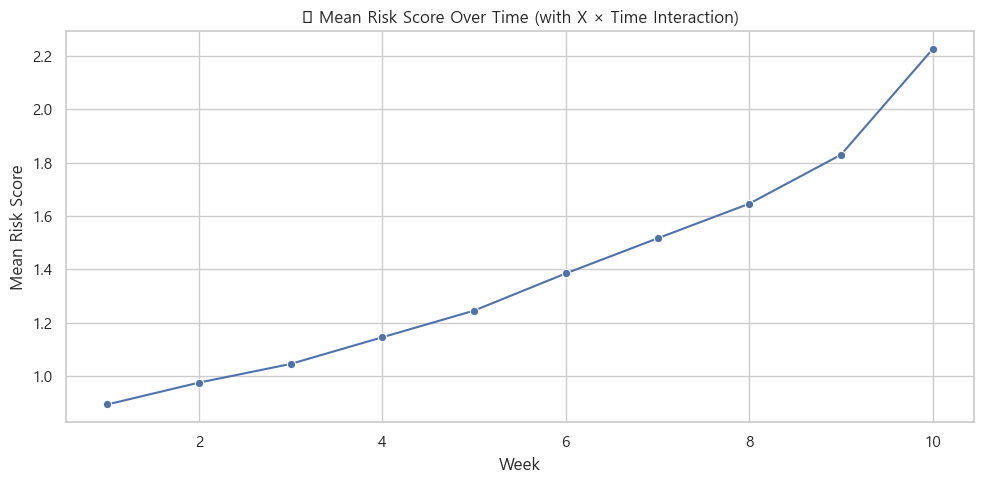

In [132]:
# ÏãúÍ∞Ñ-ÏÉÅÌò∏ÏûëÏö© Ìï≠ Ï∂îÍ∞ÄÌïú ÏÉÅÌÉúÏóêÏÑú Í≥µÏÑ†ÏÑ± ÏúÑÌóò Î≥ÄÏàò Ï†úÍ±∞Ìïú ÌõÑ ÌïôÏäµ

# 1. ÏãúÍ∞Ñ ÏÉÅÌò∏ÏûëÏö© Ìï≠ Ï∂îÍ∞Ä
features = ["popularity_log_zscore", "authentic_sum_change", "guild_flag", "liberation_flag"]
df_extended = df_cleaned.copy()

for col in features:
    df_extended[f"{col}_x_time"] = df_extended[col] * df_extended["stop"]

# 2. Í≥µÏÑ†ÏÑ± ÏúÑÌóòÏù¥ ÏûàÎäî ÏÉÅÏàò Î≥ÄÏàò Ï∞æÍ∏∞
all_vars = features + [f"{col}_x_time" for col in features]
unique_counts = df_extended[all_vars].nunique()

# 3. ÏÉÅÏàò Î≥ÄÏàò Ï†úÍ±∞
drop_cols = unique_counts[unique_counts <= 1].index.tolist()
df_model = df_extended.drop(columns=drop_cols)

# 4. Î™®Îç∏ ÌïôÏäµ
ctv_clean = CoxTimeVaryingFitter()
ctv_clean.fit(df_model.drop(columns=["week"]), id_col="ocid", start_col="start", stop_col="stop", event_col="event")

# 5. ÏúÑÌóòÎèÑ ÏòàÏ∏°
remaining_features = [col for col in df_model.columns if col not in ["ocid", "start", "stop", "event", "week"]]
df_model["risk_score"] = ctv_clean.predict_partial_hazard(df_model[remaining_features])

# 6. Ï£ºÏ∞®Î≥Ñ ÌèâÍ∑† ÏúÑÌóòÎèÑ ÏãúÍ∞ÅÌôî
risk_by_week = df_model.groupby("week")["risk_score"].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=risk_by_week, x="week", y="risk_score", marker="o")
plt.title("üìâ Mean Risk Score Over Time (with X √ó Time Interaction)")
plt.xlabel("Week")
plt.ylabel("Mean Risk Score")
plt.grid(True)
plt.tight_layout()
plt.show()


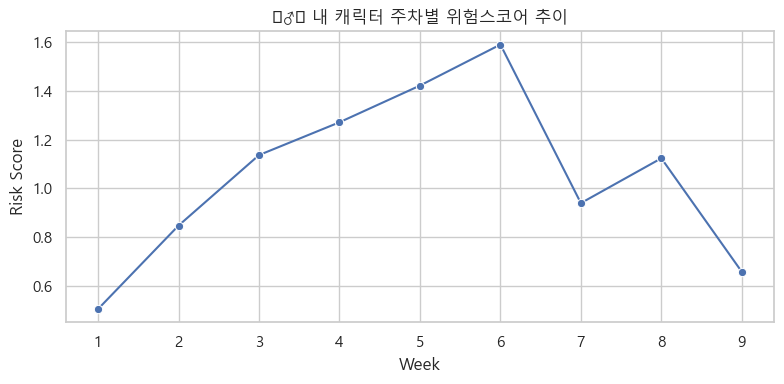

In [134]:
# ÎÑàÏùò OCID ÏßÄÏ†ï
my_ocid = "2f70c853829c5d4538e7acb25e07d6c3"

# Ìï¥Îãπ Ïú†Ï†ÄÎßå ÌïÑÌÑ∞ÎßÅ
my_df = df_model[df_model["ocid"] == my_ocid].copy()

# Ï£ºÏ∞®Î≥Ñ ÏúÑÌóòÏä§ÏΩîÏñ¥ Ï∂îÏù¥ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 4))
sns.lineplot(data=my_df, x="week", y="risk_score", marker="o")
plt.title("üßç‚Äç‚ôÇÔ∏è ÎÇ¥ Ï∫êÎ¶≠ÌÑ∞ Ï£ºÏ∞®Î≥Ñ ÏúÑÌóòÏä§ÏΩîÏñ¥ Ï∂îÏù¥")
plt.xlabel("Week")
plt.ylabel("Risk Score")
plt.grid(True)
plt.tight_layout()
plt.show()


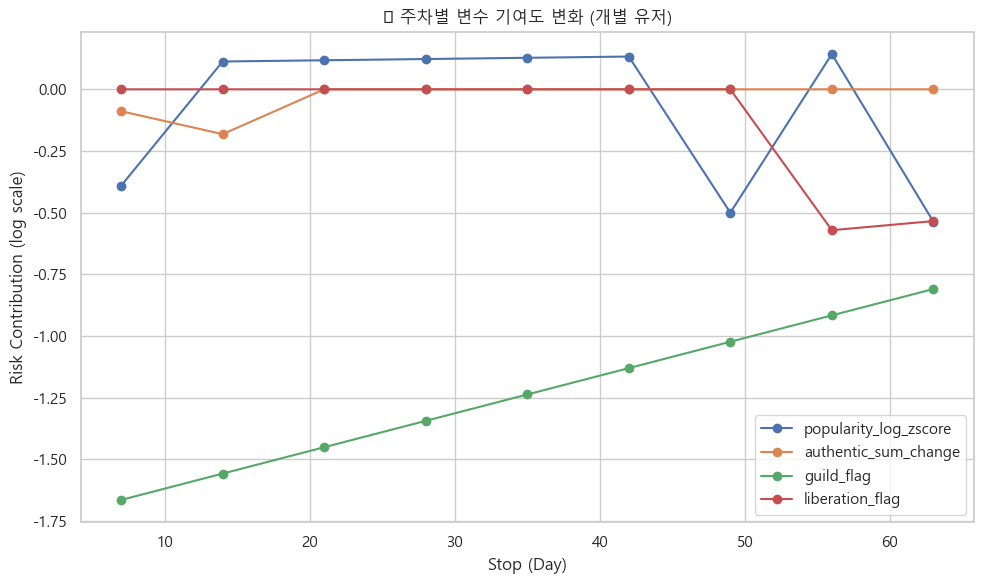

'üßç Ïú†Ï†Ä 2f70c8... | ÏµúÏã† Risk Score: 0.6579\nüìä Î≥ÄÏàòÎ≥Ñ ÏúÑÌóò Í∏∞Ïó¨ÎèÑ:\n - popularity_log_zscore    :   0.96 √ó  -0.39 + time √ó -0.003 ‚Üí  -0.54\n - authentic_sum_change     :   0.00 √ó  -0.09 + time √ó -0.000 ‚Üí  -0.00\n - guild_flag               :   1.00 √ó  -1.77 + time √ó  0.015 ‚Üí  -0.81\n - liberation_flag          :   1.00 √ó  -0.87 + time √ó  0.005 ‚Üí  -0.53\nüìå Ï¥ù log ÏúÑÌóòÎèÑ: -1.8802 ‚Üí exp = 0.1526'

In [136]:
# ÎåÄÏÉÅ Ïú†Ï†Ä OCID
target_ocid = "2f70c853829c5d4538e7acb25e07d6c3"

# Ìï¥Îãπ Ïú†Ï†Ä Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
user_df = df_model[df_model["ocid"] == target_ocid].copy()

# Î≥ÄÏàò Î™©Î°ù (ÏãúÍ∞ÑÌï≠ Ìè¨Ìï®)
features = ["popularity_log_zscore", "authentic_sum_change", "guild_flag", "liberation_flag"]

# Î≥ÄÏàòÎ≥Ñ Í∏∞Ïó¨ÎèÑ Í≥ÑÏÇ∞
for col in features:
    coef = ctv_clean.params_[col]
    coef_time = ctv_clean.params_[f"{col}_x_time"]
    user_df[f"{col}_contrib"] = user_df[col] * coef + user_df["stop"] * user_df[col] * coef_time

# ÏãúÍ∞ÅÌôî: Î≥ÄÏàòÎ≥Ñ Í∏∞Ïó¨ÎèÑ Î≥ÄÌôî
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for col in features:
    plt.plot(user_df["stop"], user_df[f"{col}_contrib"], marker='o', label=col)
plt.title("üß† Ï£ºÏ∞®Î≥Ñ Î≥ÄÏàò Í∏∞Ïó¨ÎèÑ Î≥ÄÌôî (Í∞úÎ≥Ñ Ïú†Ï†Ä)")
plt.xlabel("Stop (Day)")
plt.ylabel("Risk Contribution (log scale)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ÏµúÏã† Ï£ºÏ∞® Ìï¥ÏÑù Î¶¨Ìè¨Ìä∏ ÏÉùÏÑ±
latest = user_df.sort_values("stop").iloc[-1]
lines = [f"üßç Ïú†Ï†Ä {latest['ocid'][:6]}... | ÏµúÏã† Risk Score: {latest['risk_score']:.4f}",
         f"üìä Î≥ÄÏàòÎ≥Ñ ÏúÑÌóò Í∏∞Ïó¨ÎèÑ:"]
total_log_risk = 0
for col in features:
    val = latest[col]
    stop = latest["stop"]
    coef = ctv_clean.params_[col]
    coef_time = ctv_clean.params_[f"{col}_x_time"]
    contrib = val * coef + val * stop * coef_time
    total_log_risk += contrib
    lines.append(f" - {col:25}: {val:>6.2f} √ó {coef:>6.2f} + time √ó {coef_time:>6.3f} ‚Üí {contrib:>6.2f}")
lines.append(f"üìå Ï¥ù log ÏúÑÌóòÎèÑ: {total_log_risk:.4f} ‚Üí exp = {np.exp(total_log_risk):.4f}")
report = "\n".join(lines)

report
